# Robyn: Marketing Mix Modeling Application

This notebook demonstrates the usage of Robyn, a Marketing Mix Modeling (MMM) application. 
We'll go through the main steps of performing robyn_inputs and robyn_engineering.



## 1. Import Required Libraries. Define Paths.

First, be sure to setup your virtual environment. Be sure to switch over to your new environment in this notebook. 

-```cd {root_folder}```

-```python3 -m yourvenv```

-```source yourvenv/bin/activate```

-```cd Robyn/python```

-```pip install -r requirements.txt```


Then import the necessary libraries. Make sure to define your paths below.



In [1]:
import sys

# Add Robyn to path
sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")

In [2]:
import os
import pandas as pd
from typing import Dict
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.enums import AdstockType
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig
from robyn.modeling.model_executor import ModelExecutor
from robyn.modeling.entities.enums import NevergradAlgorithm, Models
from robyn.modeling.feature_engineering import FeatureEngineering

2024-11-30 18:58:19,335 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv_py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1 Load Mock R data

We need to set the base path for the data directory.
Create a .env file in the same directory as your notebook and put in define the path to the data dir.
for example: ROBYN_BASE_PATH=.../Robyn/R/data

In [3]:
from robyn.tutorials.utils.data_mapper import load_data_from_json, import_input_collect, import_output_models
%load_ext autoreload
%autoreload 2

# Load data from JSON exported from R
raw_input_collect = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/test_Pareto_50_iterations_1_trial_InputCollect.json"
)
# Convert R data to Python objects
r_input_collect = import_input_collect(raw_input_collect)

# Extract individual components
r_mmm_data = r_input_collect["mmm_data"]
r_featurized_mmm_data = r_input_collect["featurized_mmm_data"]
r_holidays_data = r_input_collect["holidays_data"]
r_hyperparameters = r_input_collect["hyperparameters"]

Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Raw hyperparameters data: {'facebook_S_alphas': [0.5, 3], 'facebook_S_gammas': [0.3, 1], 'facebook_S_thetas': [0, 0.3], 'print_S_alphas': [0.5, 3], 'print_S_gammas': [0.3, 1], 'print_S_thetas': [0.1, 0.4], 'tv_S_alphas': [0.5, 3], 'tv_S_gammas': [0.3, 1], 'tv_S_thetas': [0.3, 0.8], 'search_S_alphas': [0.5, 3], 'search_S_gammas': [0.3, 1], 'search_S_thetas': [0, 0.3], 'ooh_S_alphas': [0.5, 3], 'ooh_S_gammas': [0.3, 1], 'ooh_S_thetas': [0.1, 0.4], 'newsletter_alphas': [0.5, 3], 'newsletter_gammas': [0.3, 1], 'newsletter_thetas': [0.1, 0.4], 'train_size': [0.5, 0.8]}


## Setup MMM Data

We will now set up the MMM data specification which includes defining the dependent variable, independent variables, and the time window for analysis.

## Feature Preprocessing

We will perform feature engineering to prepare the data for modeling. This includes transformations like adstock and other preprocessing steps.

In [4]:
# hyperparameters = Hyperparameters(
#     hyperparameters={
#         "facebook_S": ChannelHyperparameters(
#             alphas=[0.5, 3],
#             gammas=[0.3, 1],
#             thetas=[0, 0.3],
#         ),
#         "print_S": ChannelHyperparameters(
#             alphas=[0.5, 3],
#             gammas=[0.3, 1],
#             thetas=[0.1, 0.4],
#         ),
#         "tv_S": ChannelHyperparameters(
#             alphas=[0.5, 3],
#             gammas=[0.3, 1],
#             thetas=[0.3, 0.8],
#         ),
#         "search_S": ChannelHyperparameters(
#             alphas=[0.5, 3],
#             gammas=[0.3, 1],
#             thetas=[0, 0.3],
#         ),
#         "ooh_S": ChannelHyperparameters(
#             alphas=[0.5, 3],
#             gammas=[0.3, 1],
#             thetas=[0.1, 0.4],
#         ),
#         "newsletter": ChannelHyperparameters(
#             alphas=[0.5, 3],
#             gammas=[0.3, 1],
#             thetas=[0.1, 0.4],
#         ),
#     },
#     adstock=AdstockType.GEOMETRIC,
#     lambda_=[0, 1],
#     train_size=[0.5, 0.8],
# )

# print("Hyperparameters setup complete.")

In [5]:
# # Create HolidaysData object
# holidays_data = HolidaysData(
#     dt_holidays=dt_prophet_holidays,
#     prophet_vars=["trend", "season", "holiday"],
#     prophet_country="DE",
#     prophet_signs=["default", "default", "default"],
# )
# # Setup FeaturizedMMMData
feature_engineering = FeatureEngineering(r_mmm_data, r_hyperparameters, r_holidays_data)

In [6]:
from PIL import Image
import io
import matplotlib.pyplot as plt

# Assuming plot_data is a list of bytes
plot_data = r_featurized_mmm_data.modNLS["plots"].get("facebook_I")

# Convert the list of hex strings to a single bytes object
binary_data = bytes.fromhex("".join(plot_data))

# Convert binary data to an image
image = Image.open(io.BytesIO(binary_data))

# Display the image using matplotlib
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

/var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/ipykernel_20486/286211359.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [7]:
from PIL import Image
import io
import matplotlib.pyplot as plt

# Assuming plot_data is a list of bytes
plot_data = r_featurized_mmm_data.modNLS["plots"].get("search_clicks_P")

# Convert the list of hex strings to a single bytes object
binary_data = bytes.fromhex("".join(plot_data))

# Convert binary data to an image
image = Image.open(io.BytesIO(binary_data))

# Display the image using matplotlib
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

/var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/ipykernel_20486/393114824.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [8]:
import numpy as np


# For MMM Data
def debug_mmm_data(mmm_data):
    print("=== MMM Data Debug ===")
    print("\nMMM Data Specification:")
    print(f"Dependent Variable: {mmm_data.mmmdata_spec.dep_var}")
    print(f"Paid Media Spends: {mmm_data.mmmdata_spec.paid_media_spends}")
    print(f"Paid Media Vars: {mmm_data.mmmdata_spec.paid_media_vars}")
    print(f"Organic Vars: {mmm_data.mmmdata_spec.organic_vars}")


# For Hyperparameters
def debug_hyperparameters(hyperparameters):
    print("=== Hyperparameters Debug ===")
    print("\nHyperparameters structure:")
    for channel, params in hyperparameters.hyperparameters.items():
        print(f"\nChannel: {channel}")
        print("Thetas:", getattr(params, "thetas", None))
        print("Alphas:", getattr(params, "alphas", None))
        print("Gammas:", getattr(params, "gammas", None))
        print("Shapes:", getattr(params, "shapes", None))
        print("Scales:", getattr(params, "scales", None))

    print("\nLambda:", hyperparameters.lambda_)
    print("Train size:", hyperparameters.train_size)


# For Featurized MMM Data
def debug_featurized_data(featurized_mmm_data):
    print("=== Featurized MMM Data Debug ===")
    print("\nFeaturized data shape:", featurized_mmm_data.dt_mod.shape)
    print("\nFeaturized data columns:", featurized_mmm_data.dt_mod.columns.tolist())

    # Basic statistics of the featurized data
    print("\nFeaturized data statistics:")
    print(featurized_mmm_data.dt_mod.describe())

    # Check for any transformations that occurred
    print("\nData types:")
    print(featurized_mmm_data.dt_mod.dtypes)

    # Check for any missing or infinite values
    print("\nMissing values count:")
    print(featurized_mmm_data.dt_mod.isnull().sum())
    print("\nInfinite values count:")
    print(np.isinf(featurized_mmm_data.dt_mod.select_dtypes(include=np.number)).sum())


# Combined debug function
def debug_all_inputs(mmm_data, hyperparameters, featurized_mmm_data):
    debug_mmm_data(mmm_data)
    print("\n" + "=" * 50 + "\n")
    debug_hyperparameters(hyperparameters)
    print("\n" + "=" * 50 + "\n")
    debug_featurized_data(featurized_mmm_data)


# Usage:
debug_all_inputs(r_mmm_data, r_hyperparameters, r_featurized_mmm_data)

=== MMM Data Debug ===

MMM Data Specification:
Dependent Variable: revenue
Paid Media Spends: ['tv_S', 'ooh_S', 'print_S', 'facebook_S', 'search_S']
Paid Media Vars: ['tv_S', 'ooh_S', 'print_S', 'facebook_I', 'search_clicks_P']
Organic Vars: ['newsletter']


=== Hyperparameters Debug ===

Hyperparameters structure:

Channel: facebook_S
Thetas: [0, 0.3]
Alphas: [0.5, 3]
Gammas: [0.3, 1]
Shapes: None
Scales: None

Channel: print_S
Thetas: [0.1, 0.4]
Alphas: [0.5, 3]
Gammas: [0.3, 1]
Shapes: None
Scales: None

Channel: tv_S
Thetas: [0.3, 0.8]
Alphas: [0.5, 3]
Gammas: [0.3, 1]
Shapes: None
Scales: None

Channel: search_S
Thetas: [0, 0.3]
Alphas: [0.5, 3]
Gammas: [0.3, 1]
Shapes: None
Scales: None

Channel: ooh_S
Thetas: [0.1, 0.4]
Alphas: [0.5, 3]
Gammas: [0.3, 1]
Shapes: None
Scales: None

Channel: newsletter
Thetas: [0.1, 0.4]
Alphas: [0.5, 3]
Gammas: [0.3, 1]
Shapes: None
Scales: None

Lambda: 0.0
Train size: [0.5, 0.8]


=== Featurized MMM Data Debug ===

Featurized data shape: (208, 

In [9]:
def convert_r_data_to_python_format(
    r_mmm_data, r_hyperparameters, r_featurized_mmm_data
):
    """
    Convert R imported data to match Python's expected format
    """
    import pandas as pd
    import copy

    # Deep copy to avoid modifying original data
    mmm_data = copy.deepcopy(r_mmm_data)
    hyperparameters = copy.deepcopy(r_hyperparameters)
    featurized_mmm_data = copy.deepcopy(r_featurized_mmm_data)

    # 1. Fix column names in featurized data
    if "dep_var" in featurized_mmm_data.dt_mod.columns:
        featurized_mmm_data.dt_mod = featurized_mmm_data.dt_mod.rename(
            columns={"dep_var": "revenue"}
        )

    # 2. Convert date column to datetime
    featurized_mmm_data.dt_mod["ds"] = pd.to_datetime(featurized_mmm_data.dt_mod["ds"])

    # 3. Update lambda in hyperparameters
    hyperparameters.lambda_ = [0, 1]  # Change from 0.0 to [0, 1]

    # 4. Ensure all numeric columns are float64 (except competitor_sales_B which should be int64)
    numeric_cols = featurized_mmm_data.dt_mod.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col != "competitor_sales_B":
            featurized_mmm_data.dt_mod[col] = featurized_mmm_data.dt_mod[col].astype(
                "float64"
            )
    featurized_mmm_data.dt_mod["competitor_sales_B"] = featurized_mmm_data.dt_mod[
        "competitor_sales_B"
    ].astype("int64")

    return mmm_data, hyperparameters, featurized_mmm_data


# Convert the data
converted_mmm_data, converted_hyperparameters, converted_featurized_mmm_data = (
    convert_r_data_to_python_format(
        r_mmm_data, r_hyperparameters, r_featurized_mmm_data
    )
)

# Verify the conversion
print("=== Verifying Conversion ===")
print("\nChecking column names:")
print(converted_featurized_mmm_data.dt_mod.columns.tolist())

print("\nChecking data types:")
print(converted_featurized_mmm_data.dt_mod.dtypes)

print("\nChecking lambda parameter:")
print(converted_hyperparameters.lambda_)

print("\nChecking a few rows of numeric data to ensure precision is maintained:")
numeric_cols = converted_featurized_mmm_data.dt_mod.select_dtypes(
    include=[np.number]
).columns
print(converted_featurized_mmm_data.dt_mod[numeric_cols].head())

=== Verifying Conversion ===

Checking column names:
['ds', 'revenue', 'trend', 'season', 'holiday', 'competitor_sales_B', 'events', 'tv_S', 'ooh_S', 'print_S', 'facebook_S', 'search_S', 'newsletter']

Checking data types:
ds                    datetime64[ns]
revenue                      float64
trend                        float64
season                       float64
holiday                      float64
competitor_sales_B             int64
events                       float64
tv_S                         float64
ooh_S                        float64
print_S                      float64
facebook_S                   float64
search_S                     float64
newsletter                   float64
dtype: object

Checking lambda parameter:
[0, 1]

Checking a few rows of numeric data to ensure precision is maintained:
        revenue         trend        season        holiday  \
0  2.754372e+06  1.715453e+06  1.126434e+06       0.000000   
1  2.584277e+06  1.716652e+06  9.012481e+05       0

2024-11-30 18:58:23,967 - robyn.modeling.base_model_executor - INFO - Initializing BaseModelExecutor
2024-11-30 18:58:23,967 - robyn.modeling.model_executor - INFO - Starting model execution with model_name=Models.RIDGE
2024-11-30 18:58:23,967 - robyn.modeling.base_model_executor - INFO - Input validation successful
2024-11-30 18:58:23,968 - robyn.common.common_util - WARNING - Requested cores (16) exceeds available cores (10). Will use 10 cores.
2024-11-30 18:58:23,968 - robyn.modeling.base_model_executor - INFO - Preparing hyperparameters
2024-11-30 18:58:23,968 - robyn.modeling.base_model_executor - INFO - Completed hyperparameter preparation with 20 parameters to optimize
2024-11-30 18:58:23,969 - robyn.modeling.model_executor - INFO - Initializing Ridge model builder
2024-11-30 18:58:23,969 - robyn.modeling.model_executor - INFO - Building models with configured parameters
2024-11-30 18:58:23,969 - robyn.modeling.ridge.ridge_data_builder - INFO - Collecting hyperparameters for opt

>>> Starting 5 trials with 2000 iterations each using TwoPointsDE nevergrad algorithm on x cores...


Running trial 1 of total 5 trials: 100%|███████████████████████████████████
2024-11-30 19:00:05,741 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.70 mins
Running trial 2 of total 5 trials: 100%|███████████████████████████████████
2024-11-30 19:01:47,011 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.67 mins
Running trial 3 of total 5 trials: 100%|███████████████████████████████████
2024-11-30 19:03:27,245 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.66 mins
Running trial 4 of total 5 trials: 100%|███████████████████████████████████
2024-11-30 19:05:06,351 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.65 mins
Running trial 5 of total 5 trials: 100%|███████████████████████████████████
2024-11-30 19:06:47,307 - robyn.modeling.ridge.ridge_evaluate_model - INFO -  Finished in 1.68 mins
2024-11-30 19:06:47,683 - robyn.visualization.model_convergence_visualizer - INFO - Initialized ModelConvergenceVisualiz

Model training complete.


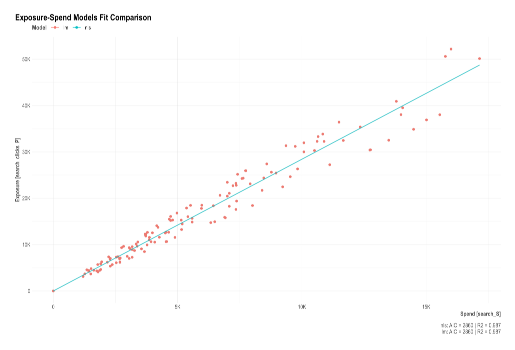

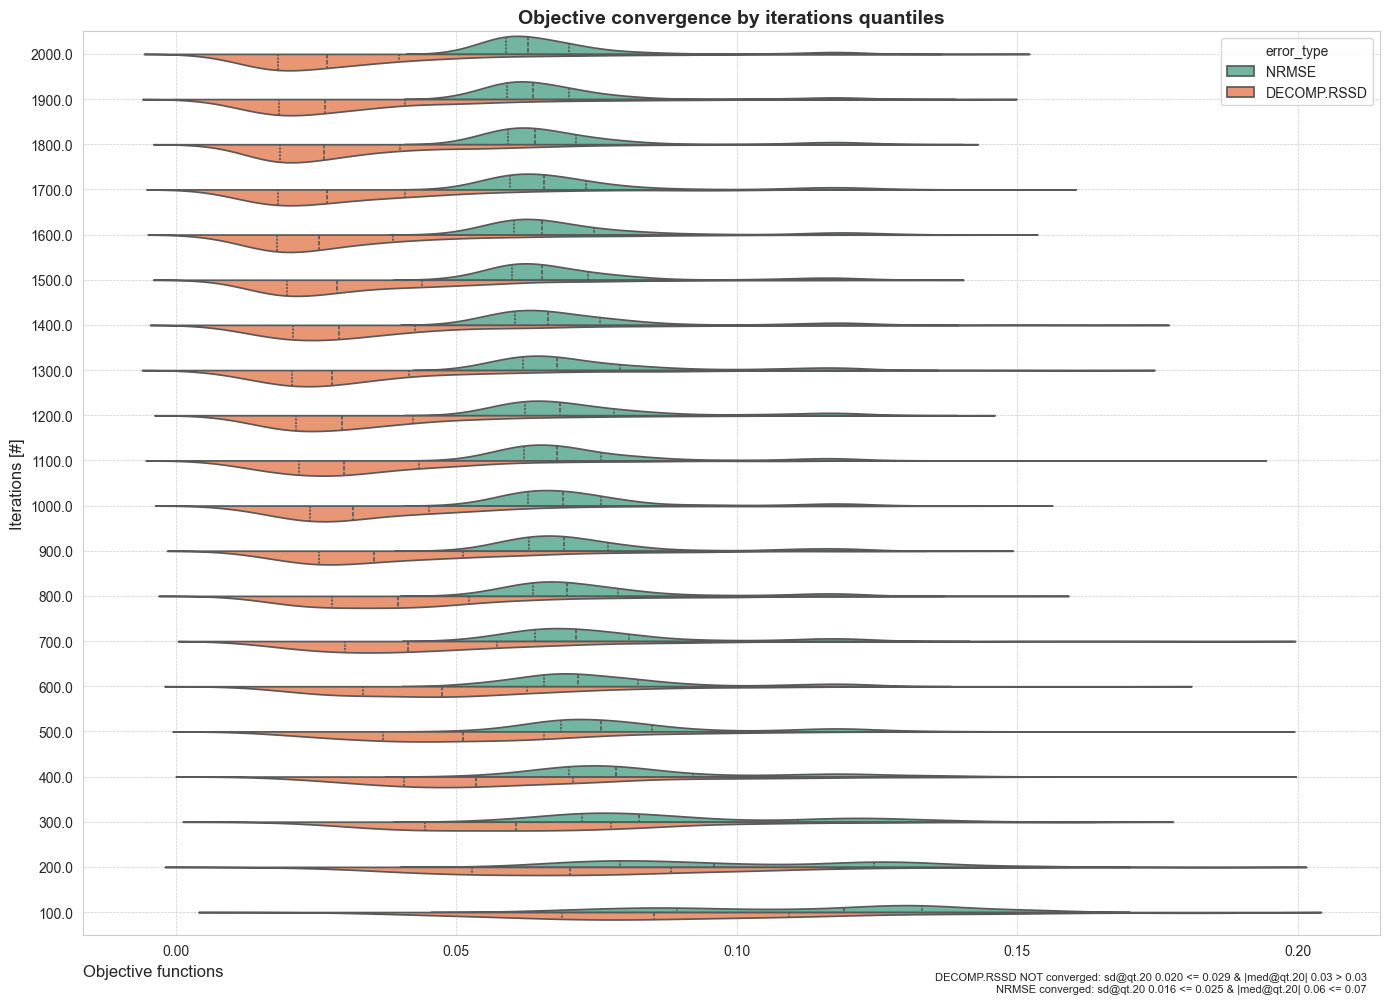

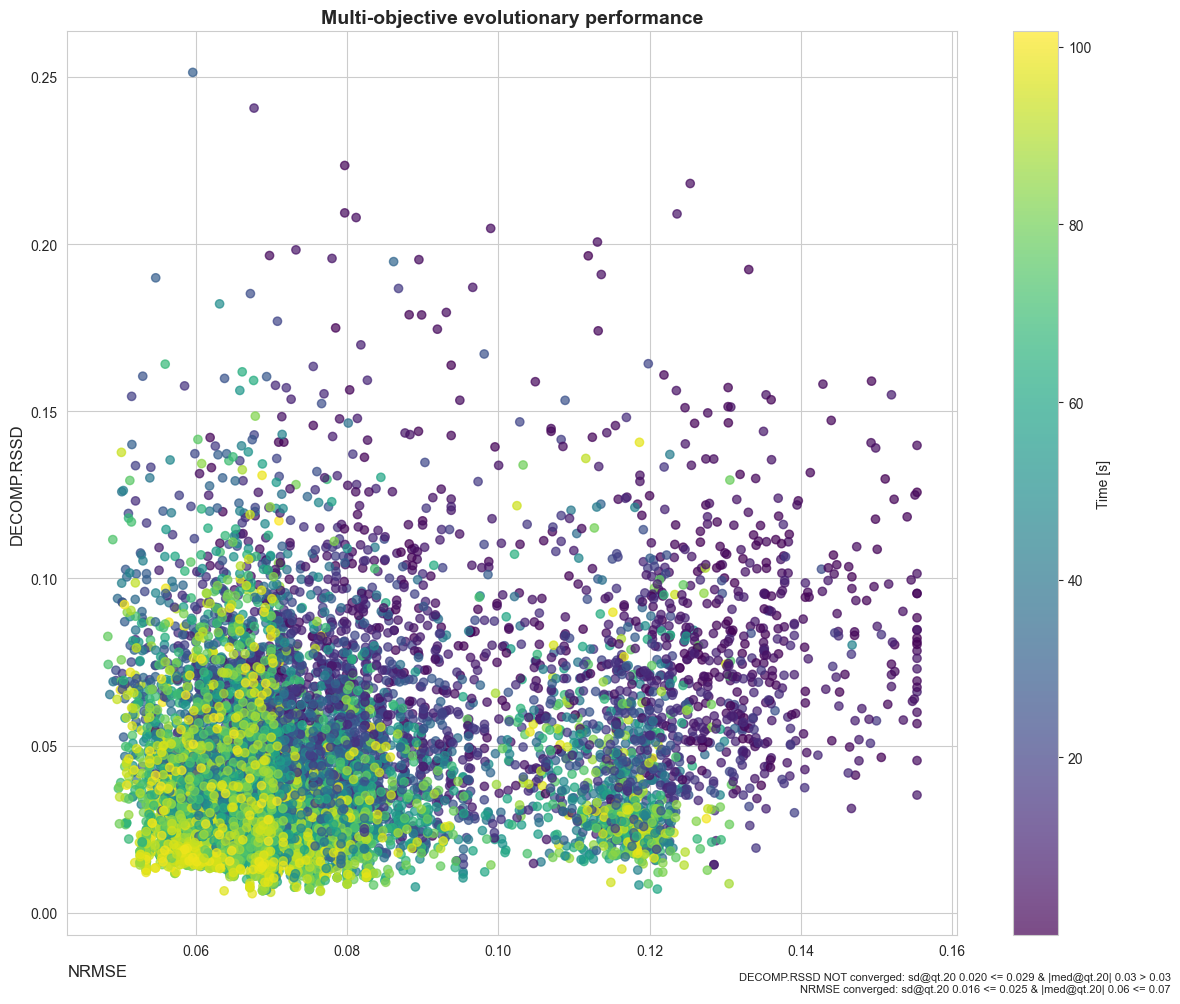

In [10]:
%matplotlib inline
# Setup ModelExecutor
model_executor = ModelExecutor(
    mmmdata=converted_mmm_data,
    holidays_data=r_holidays_data,
    hyperparameters=converted_hyperparameters,
    calibration_input=None,  # Add calibration input if available
    featurized_mmm_data=converted_featurized_mmm_data,
)

# Setup TrialsConfig
trials_config = TrialsConfig(
    iterations=2000, trials=5
)  # Set to the number of cores you want to use

print(
    f">>> Starting {trials_config.trials} trials with {trials_config.iterations} iterations each using {NevergradAlgorithm.TWO_POINTS_DE.value} nevergrad algorithm on x cores..."
)

# Run the model

output_models = model_executor.model_run(
    trials_config=trials_config,
    ts_validation=True,  # changed from True to False -> deacitvate
    add_penalty_factor=False,
    rssd_zero_penalty=True,
    cores=16,
    nevergrad_algo=NevergradAlgorithm.TWO_POINTS_DE,
    intercept=True,
    intercept_sign="non_negative",
    model_name=Models.RIDGE,
)
print("Model training complete.")

In [11]:
from robyn.tutorials.utils.data_mapper import load_data_from_json, import_input_collect, import_output_models
%load_ext autoreload
%autoreload 2

raw_output_models = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/test_Pareto_50_iterations_1_trial_OutputModels.json"
)

r_output_models = import_output_models(raw_output_models)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Debug: R output data keys: ['trial1', 'train_timestamp', 'cores', 'iterations', 'trials']
Data for trial1: Keys = ['resultCollect', 'hyperBoundNG', 'hyperBoundFixed']
Debug: resultCollect keys for trial1: ['resultHypParam', 'xDecompAgg', 'decompSpendDist', 'iter', 'elapsed.min']
Debug: Sample resultHypParam for trial1: [{'facebook_S_alphas': 1.98202923325, 'facebook_S_gammas': 0.58424338159, 'facebook_S_thetas': 0.09072730547999999, 'newsletter_alphas': 1.7514167265, 'newsletter_gammas': 0.6585122811199999, 'newsletter_thetas': 0.22826231587, 'ooh_S_alphas': 1.9350874957500002, 'ooh_S_gammas': 0.80499137605, 'ooh_S_thetas': 0.26847073588000003, 'print_S_alphas': 1.3471347205000002, 'print_S_gammas': 0.6602001640299999, 'print_S_thetas': 0.34398200833000003, 'search_S_alphas': 1.835435262, 'search_S_gammas': 0.6915214566899999, 'search_S_thetas': 0.11253588111, 'tv_S_alphas': 1.71477961025, 'tv_S_gam

In [12]:
from robyn.tutorials.utils.data_mapper import load_data_from_json, import_input_collect, import_output_models
%load_ext autoreload
%autoreload 2

# Load data from JSON exported from R
raw_input_collect = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/Pareto_50_InputCollect.json"
)
raw_output_models = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/Pareto_50_OutputModels.json"
)

# Convert R data to Python objects
r_input_collect = import_input_collect(raw_input_collect)
r_output_models = import_output_models(raw_output_models)

# Extract individual components
r_mmm_data = r_input_collect["mmm_data"]
r_featurized_mmm_data = r_input_collect["featurized_mmm_data"]
r_holidays_data = r_input_collect["holidays_data"]
r_hyperparameters = r_input_collect["hyperparameters"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Raw hyperparameters data: {'facebook_S_alphas': [0.5, 3], 'facebook_S_gammas': [0.3, 1], 'facebook_S_thetas': [0, 0.3], 'print_S_alphas': [0.5, 3], 'print_S_gammas': [0.3, 1], 'print_S_thetas': [0.1, 0.4], 'tv_S_alphas': [0.5, 3], 'tv_S_gammas': [0.3, 1], 'tv_S_thetas': [0.3, 0.8], 'search_S_alphas': [0.5, 3], 'search_S_gammas': [0.3, 1], 'search_S_thetas': [0, 0.3], 'ooh_S_alphas': [0.5, 3], 'ooh_S_gammas': [0.3, 1], 'ooh_S_thetas': [0.1, 0.4], 'newsletter_alphas': [0.5, 3], 'newsletter_gammas': [0.3, 1], 'newsletter_thetas': [0.1, 0.4], 'train_size': [0.5, 0.8]}
Debug: R output data keys: ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']
Data for trial1: Keys = ['resultCollect', 'hyperBoundNG', 'hyperBoundFixed']
Debug: resultCollect keys for trial1: 

In [13]:
# new anytree

from anytree import Node, RenderTree
from dataclasses import is_dataclass, asdict
import pandas as pd


def build_tree(data, parent_key="", limit_trials=True):
    """
    Recursively build a tree structure from a dictionary, list, or dataclass.

    Args:
        data: The data structure (dict, list, or dataclass) to traverse.
        parent_key: The base key path for nested keys.
        limit_trials: Whether to limit the output to the first trial.

    Returns:
        A tree node representing the structure of the data.
    """
    if is_dataclass(data):
        data = asdict(data)  # Convert dataclass to dictionary

    if isinstance(data, dict):
        node = Node(f"{parent_key} (Dict)")
        for key, value in data.items():
            full_key = f"{parent_key}.{key}" if parent_key else key
            child_node = build_tree(value, full_key, limit_trials)
            child_node.parent = node
        return node
    elif isinstance(data, list):
        node = Node(f"{parent_key} (List)")
        for index, item in enumerate(data):
            if limit_trials and parent_key == "trials" and index > 0:
                break
            full_key = f"{parent_key}[{index}]"
            child_node = build_tree(item, full_key, limit_trials)
            child_node.parent = node
        return node
    elif isinstance(data, pd.DataFrame):
        node = Node(f"{parent_key} (DataFrame)")
        for column in data.columns:
            dtype = data[column].dtype
            column_node = Node(f"{parent_key}.{column} (dtype: {dtype})")
            column_node.parent = node
        return node
    else:
        dtype = type(data).__name__
        return Node(f"{parent_key} (dtype: {dtype})")


# Assuming output_models and r_output_models are instances of ModelOutputs
python_tree = build_tree(output_models)
r_tree = build_tree(r_output_models)

# Visualize the trees
print("Python ModelOutputs Structure:")
for pre, fill, node in RenderTree(python_tree):
    print(f"{pre}{node.name}")

print("\nR ModelOutputs Structure:")
for pre, fill, node in RenderTree(r_tree):
    print(f"{pre}{node.name}")

Python ModelOutputs Structure:
 (Dict)
├── trials (List)
│   └── trials[0] (Dict)
│       ├── trials[0].result_hyp_param (DataFrame)
│       │   ├── trials[0].result_hyp_param.facebook_S_thetas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.facebook_S_alphas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.facebook_S_gammas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.print_S_thetas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.print_S_alphas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.print_S_gammas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.tv_S_thetas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.tv_S_alphas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.tv_S_gammas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.search_S_thetas (dtype: float64)
│       │   ├── trials[0].result_hyp_param.search_S_alphas (dtype: float64)
│       │   ├── trials[0].result_hyp_par

In [14]:
# from anytree import Node, RenderTree
# from anytree.exporter import DotExporter
# from dataclasses import is_dataclass, asdict
# import pandas as pd


# def build_tree(data, parent_key="", limit_trials=True):
#     """
#     Recursively build a tree structure from a dictionary, list, or dataclass.

#     Args:
#         data: The data structure (dict, list, or dataclass) to traverse.
#         parent_key: The base key path for nested keys.
#         limit_trials: Whether to limit the output to the first trial.

#     Returns:
#         A tree node representing the structure of the data.
#     """
#     if is_dataclass(data):
#         data = asdict(data)  # Convert dataclass to dictionary

#     if isinstance(data, dict):
#         node = Node(parent_key)
#         for key, value in data.items():
#             full_key = f"{parent_key}.{key}" if parent_key else key
#             child_node = build_tree(value, full_key, limit_trials)
#             child_node.parent = node
#         return node
#     elif isinstance(data, list):
#         node = Node(parent_key)
#         for index, item in enumerate(data):
#             if limit_trials and parent_key == "trials" and index > 0:
#                 break
#             full_key = f"{parent_key}[{index}]"
#             child_node = build_tree(item, full_key, limit_trials)
#             child_node.parent = node
#         return node
#     elif isinstance(data, pd.DataFrame):
#         node = Node(f"{parent_key} (DataFrame: {data.shape})")
#         for column in data.columns:
#             column_node = Node(f"{parent_key}.{column}")
#             column_node.parent = node
#         return node
#     else:
#         return Node(parent_key)


# # Assuming output_models and r_output_models are instances of ModelOutputs
# python_tree = build_tree(output_models)
# r_tree = build_tree(r_output_models)

# # Visualize the trees
# print("Python ModelOutputs Structure:")
# for pre, fill, node in RenderTree(python_tree):
#     print(f"{pre}{node.name}")

# print("\nR ModelOutputs Structure:")
# for pre, fill, node in RenderTree(r_tree):
#     print(f"{pre}{node.name}")

In [15]:
import pandas as pd
import numpy as np
from typing import Dict, Any


def compare_model_values(py_output, r_output):
    """Compare key values between Python and R model outputs"""

    print("1. Basic Model Configuration Comparison:")
    basic_attrs = [
        "train_timestamp",
        "cores",
        "iterations",
        "intercept",
        "intercept_sign",
        "nevergrad_algo",
        "ts_validation",
        "add_penalty_factor",
    ]

    # Add debug prints
    print("\nDebugging attribute types:")
    for attr in basic_attrs:
        py_val = getattr(py_output, attr, None)
        r_val = getattr(r_output, attr, None)
        print(f"{attr:20s} - Python type: {type(py_val)} | R type: {type(r_val)}")
        print(f"{attr:20s} - Python value: {py_val} | R value: {r_val}")
        print("-" * 50)

    print("\n2. Trial Results Comparison (Descriptive Statistics):")
    if py_output.trials and r_output.trials:
        metrics = [
            "nrmse",
            "decomp_rssd",
            "mape",
            "rsq_train",
            "rsq_val",
            "rsq_test",
            "lambda_",
            "lambda_hp",
            "lambda_max",
            "lambda_min_ratio",
        ]
        # Convert trial results to DataFrames
        py_trials_df = pd.DataFrame(
            [
                {metric: getattr(trial, metric, np.nan) for metric in metrics}
                for trial in py_output.trials
            ]
        )

        # Aggregate R trial metrics
        r_trials_df = pd.DataFrame(
            [
                {
                    metric: getattr(trial, metric, pd.Series([np.nan])).mean()
                    for metric in metrics
                }
                for trial in r_output.trials
            ]
        )
        # Ensure R trial data is numeric
        r_trials_df = r_trials_df.apply(pd.to_numeric, errors="coerce")
        # Calculate descriptive statistics
        py_desc = py_trials_df.describe()
        r_desc = r_trials_df.describe()
        # Print descriptive statistics
        print("\nPython Trial Descriptive Statistics:")
        print(py_desc)
        print("\nR Trial Descriptive Statistics:")
        print(r_desc)
        # Calculate and print differences
        diff_desc = py_desc - r_desc
        print("\nDifference in Descriptive Statistics:")
        print(diff_desc)

    print("\n3. Hyperparameter Comparison:")
    if hasattr(py_output, "hyper_updated") and hasattr(r_output, "hyper_updated"):
        py_hyper = py_output.hyper_updated
        r_hyper = r_output.hyper_updated

        # Find all unique keys
        all_keys = set(py_hyper.keys()) | set(r_hyper.keys())

        print("\nHyperparameter Values:")
        print(f"{'Parameter':30s} {'Python':>15s} {'R':>15s} {'Diff':>15s}")
        print("-" * 75)

        for key in sorted(all_keys):
            py_val = py_hyper.get(key, "N/A")
            r_val = r_hyper.get(key, "N/A")

            if isinstance(py_val, (int, float)) and isinstance(r_val, (int, float)):
                diff = abs(py_val - r_val)
                print(f"{key:30s} {py_val:15.6f} {r_val:15.6f} {diff:15.6f}")
            else:
                print(f"{key:30s} {str(py_val):15s} {str(r_val):15s} {'N/A':>15s}")

    print("\n4. Data Shape Comparison:")
    data_attrs = ["all_result_hyp_param", "all_x_decomp_agg", "all_decomp_spend_dist"]

    for attr in data_attrs:
        py_shape = getattr(py_output, attr).shape if hasattr(py_output, attr) else None
        r_shape = getattr(r_output, attr).shape if hasattr(r_output, attr) else None
        print(f"{attr:20s} - Python shape: {py_shape} | R shape: {r_shape}")

    print("\n5. Total Effect and Effect Share Comparison:")
    if py_output.trials and r_output.trials:
        for i, (py_trial, r_trial) in enumerate(zip(py_output.trials, r_output.trials)):
            print(f"\nTrial {i+1}:")
            # Extract decomp_spend_dist DataFrames
            py_decomp_spend_dist = getattr(
                py_trial, "decomp_spend_dist", pd.DataFrame()
            )
            r_decomp_spend_dist = getattr(r_trial, "decomp_spend_dist", pd.DataFrame())
            # Check if the DataFrames are not empty
            if not py_decomp_spend_dist.empty and not r_decomp_spend_dist.empty:
                # Compare total effect
                py_total_effect = py_decomp_spend_dist.get(
                    "xDecompAgg", pd.Series([np.nan])
                ).sum()
                r_total_effect = r_decomp_spend_dist.get(
                    "xDecompAgg", pd.Series([np.nan])
                ).sum()
                total_effect_diff = abs(py_total_effect - r_total_effect)
                print(
                    f"Total Effect - Python: {py_total_effect:.6f}, R: {r_total_effect:.6f}, Diff: {total_effect_diff:.6f}"
                )
                # Compare effect share
                py_effect_share = py_decomp_spend_dist.get(
                    "effect_share", pd.Series([np.nan])
                ).sum()
                r_effect_share = r_decomp_spend_dist.get(
                    "effect_share", pd.Series([np.nan])
                ).sum()
                effect_share_diff = abs(py_effect_share - r_effect_share)
                print(
                    f"Effect Share - Python: {py_effect_share:.6f}, R: {r_effect_share:.6f}, Diff: {effect_share_diff:.6f}"
                )
            else:
                print(
                    "Decomposition spend distribution data is missing for this trial."
                )


# Run the comparison
print("Starting detailed value comparison...\n")
compare_model_values(output_models, r_output_models)

Starting detailed value comparison...

1. Basic Model Configuration Comparison:

Debugging attribute types:
train_timestamp      - Python type: <class 'str'> | R type: <class 'str'>
train_timestamp      - Python value: 2024-11-30 18:58:23 | R value: 2024-11-26 13:00:15
--------------------------------------------------
cores                - Python type: <class 'int'> | R type: <class 'int'>
cores                - Python value: 10 | R value: 9
--------------------------------------------------
iterations           - Python type: <class 'int'> | R type: <class 'int'>
iterations           - Python value: 2000 | R value: 50
--------------------------------------------------
intercept            - Python type: <class 'bool'> | R type: <class 'bool'>
intercept            - Python value: True | R value: True
--------------------------------------------------
intercept_sign       - Python type: <class 'str'> | R type: <class 'str'>
intercept_sign       - Python value: non_negative | R value: 

/var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/ipykernel_20486/3835541963.py:65: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  py_desc = py_trials_df.describe()
/var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/ipykernel_20486/3835541963.py:65: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  py_desc = py_trials_df.describe()
/var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/ipykernel_20486/3835541963.py:65: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  py_desc = py_trials_df.describe()
/var/folders/gm/g5cpl7110m96nfd1qr1xwnwc0000gn/T/ipykernel_20486/3835541963.py:65: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  py

In [16]:
# # Function to print model output summary
# def print_model_output_summary(model_name, model):
#     print(f"\n{model_name} Model Output Summary:")
#     print(f"Number of trials: {len(model.trials)}")
#     print(
#         f"Average models per trial: {len(model.all_result_hyp_param) / len(model.trials)}"
#     )
#     print(f"Total unique models: {len(model.all_result_hyp_param['sol_id'].unique())}")

#     print("\nMetrics Distribution:")
#     metrics_df = model.all_result_hyp_param[["nrmse", "decomp.rssd", "mape"]]
#     print(metrics_df.describe())

#     # Additional validation to debug model output
#     print("\nColumns in result_hyp_param:")
#     print(model.all_result_hyp_param.columns.tolist())

#     print("\nSample rows of metrics:")
#     print(model.all_result_hyp_param[["sol_id", "nrmse", "decomp.rssd", "mape"]].head())

#     # Show shape of result dataframes
#     print("\nDataFrame Shapes:")
#     print(f"result_hyp_param: {model.all_result_hyp_param.shape}")
#     print(f"x_decomp_agg: {model.all_x_decomp_agg.shape}")
#     print(f"decomp_spend_dist: {model.all_decomp_spend_dist.shape}")


# # Print summaries for both output_models and r_output_models
# print_model_output_summary("Python Output Models", output_models)
# print_model_output_summary("R Output Models", r_output_models)

In [17]:
# def print_data_structure(data):
#     print("Columns:", data.columns.tolist())
#     print("\nFirst row:", data.iloc[0].to_dict())
#     print("\nShape:", data.shape)


# # Assuming you want to print the structure for the first trial
# first_trial_r = r_output_models.trials[0].decomp_spend_dist
# first_trial_python = output_models.trials[0].decomp_spend_dist

# print("R exported data structure:")
# print_data_structure(first_trial_r)

# # With Python calculated data
# print("\nPython calculated data structure:")
# print_data_structure(first_trial_python)